# QPSK

In [1]:
import numpy as np 
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
def modulator(m, fc, ts, nsamples):
    amc = [0]*len(m)
    ams = [0]*len(m)
    for i in range(len(m)):
        if m[i] == 0:
            amc[i],ams[i] = 1,1
        elif m[i] == 1:
            amc[i],ams[i] = -1,1
        elif m[i] == 2:
            amc[i],ams[i] = -1,-1
        elif m[i] == 3:
            amc[i],ams[i] = 1,-1
    sm = [0] * (nsamples*len(m))
    for i in range(nsamples*len(m)):
        sm[i] = np.sqrt(2/ts)*(amc[i//nsamples]*np.cos(2*np.pi*fc*i/nsamples*ts/len(m)) + ams[i//nsamples]*np.sin(2*np.pi*fc*i/nsamples*ts/len(m)))
    return sm

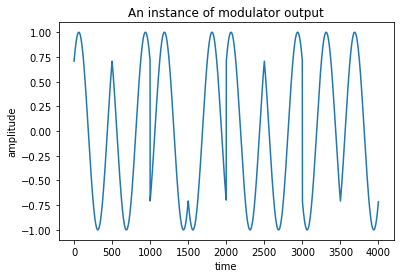

In [4]:
y = modulator([0,3,1,2,0,3,2,1],2,4,500)
plt.plot(y)
plt.title("An instance of modulator output")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.show()

In [5]:
def demodulator(signal, fc, ts, nsamples):
    y0 = [0] * len(signal)
    y1 = [0] * len(signal)
    y2 = [0] * len(signal)
    y3 = [0] * len(signal)
    for i in range(len(signal)):
        y0[i] = np.sqrt(2/ts)*(np.cos(2*np.pi*fc*i/len(signal)*ts) + np.sin(2*np.pi*fc*i/len(signal)*ts))
        y1[i] = np.sqrt(2/ts)*(-np.cos(2*np.pi*fc*i/len(signal)*ts) + np.sin(2*np.pi*fc*i/len(signal)*ts))
        y2[i] = np.sqrt(2/ts)*(-np.cos(2*np.pi*fc*i/len(signal)*ts) - np.sin(2*np.pi*fc*i/len(signal)*ts))
        y3[i] = np.sqrt(2/ts)*(np.cos(2*np.pi*fc*i/len(signal)*ts) - np.sin(2*np.pi*fc*i/len(signal)*ts))
    corr = [0] * (len(signal)//nsamples)
    for i in range(len(signal)//nsamples):
        c0 = np.corrcoef(signal[i*nsamples:(i+1)*nsamples-1], y0[i*nsamples:(i+1)*nsamples-1])
        c1 = np.corrcoef(signal[i*nsamples:(i+1)*nsamples-1], y1[i*nsamples:(i+1)*nsamples-1])
        c2 = np.corrcoef(signal[i*nsamples:(i+1)*nsamples-1], y2[i*nsamples:(i+1)*nsamples-1])
        c3 = np.corrcoef(signal[i*nsamples:(i+1)*nsamples-1], y3[i*nsamples:(i+1)*nsamples-1])
        corr[i] = np.argmax([c0[0][1], c1[0][1], c2[0][1], c3[0][1]])
    return corr

In [6]:
demodulator(y, 2, 4, 500)

[0, 3, 1, 2, 0, 3, 2, 1]